<h1><em>Обробка та аналіз БМД Лабораторна 5 Кононов Антон БС-82</em></h1>

<h3>КРИТЕРІЙ ПІРСОНА ДЛЯ ПОРІВНЯННЯ ДЕКІЛЬКОЇ ГРУП ЗА РОЗПОДІЛЕННЯМ ОЗНАКИ</h3>

1.Обрати реальні дані з kaggle або сгенерувати випадкові дані, що містять розподіл деякої ознаки в двох групах.

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import copy 

In [145]:
data = pd.read_csv('cwurData.csv')
data

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [146]:
col_names = ["USA", "United Kingdom"]
table = pd.DataFrame(columns = col_names)
A_USA = 0
B_USA = 0
C_USA = 0
D_USA = 0
E_USA = 0
A_UK = 0
B_UK = 0
C_UK = 0
D_UK = 0
E_UK = 0
N = data.shape[0]

for i in range(N):
        if "USA" in data["country"][i]:
            if (data['score'][i] >= 95):
                A_USA += 1
            elif ((data['score'][i] >= 85) & (data['score'][i] < 95)):
                B_USA += 1
            elif ((data['score'][i] >= 75) & (data['score'][i] < 85)):
                C_USA += 1
            elif ((data['score'][i] >= 60) & (data['score'][i] < 75)):
                D_USA += 1
            else:
                E_USA += 1
        elif ("United Kingdom" in data["country"][i]):
            if (data['score'][i] >= 95):
                A_UK += 1
            elif ((data['score'][i] >= 85) & (data['score'][i] < 95)):
                B_UK += 1
            elif ((data['score'][i] >= 75) & (data['score'][i] < 85)):
                C_UK += 1
            elif ((data['score'][i] >= 60) & (data['score'][i] < 75)):
                D_UK += 1
            else:
                E_UK += 1

table = pd.DataFrame({"USA": pd.Series([A_USA, B_USA, C_USA, D_USA, E_USA], index = ["More than 95", "Between 85 and 95","Beetween 75 and 85", "Beetween 60 and 75", "Less than 60"]),
                     "United Kingdom": pd.Series([A_UK, B_UK, C_UK, D_UK, E_UK], index = ["More than 95", "Between 85 and 95","Beetween 75 and 85", "Beetween 60 and 75", "Less than 60"])})
new_table = copy.deepcopy(table)
table

,USA,United Kingdom
More than 95,10,4
Between 85 and 95,18,3
Beetween 75 and 85,15,1
Beetween 60 and 75,35,2
Less than 60,495,134


2.Побудувати графік, що відображає розподіл ознак в групах.

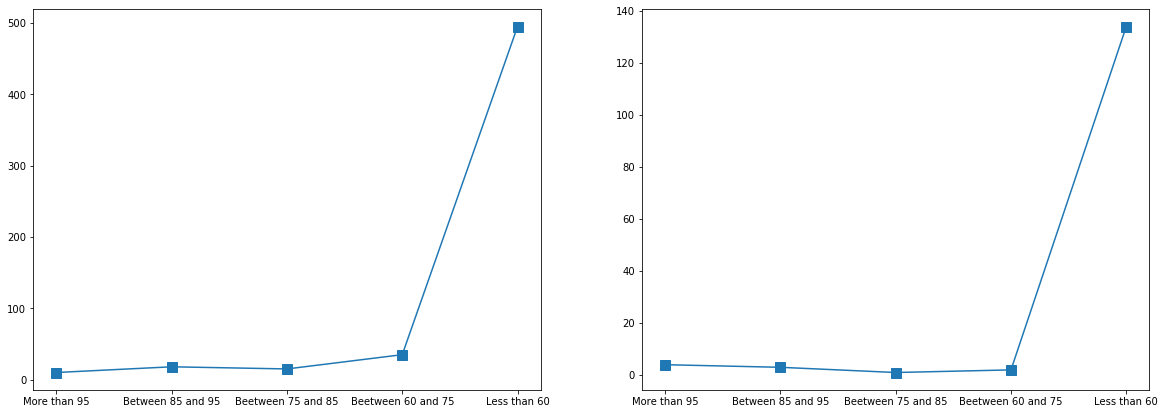

In [147]:
plt.subplots(1,2,figsize = (20,7))
plt.subplot(1, 2, 1)
plt.plot(table.index, table['USA'], marker = 's', markersize = 10)

plt.subplot(1, 2, 2)
plt.plot(table.index, table['United Kingdom'], marker = 's', markersize = 10)

3. Написати функції, що оцінює зв'язок між ознакою та групою за критерієм Пірсона. Функція має оцінювати розбіжність на двох рівнях - 0,01 та 0,05, в залежністі від параметру significant_level, що передається в неї. Врахувати у функції випадок, що сума частот ознаки у групах може бути відмінною.

In [148]:
def Pirson(new_data, significant_level):
    N = new_data.shape[0]
    if(sum(new_data["USA"]) != sum(new_data["United Kingdom"])):
        new_data["USA"] = [new_data["USA"][i] * 100 / sum(new_data["USA"]) for i in range(N)]
        new_data["United Kingdom"] = [new_data["United Kingdom"][i] * 100 / sum(new_data["United Kingdom"]) for i in range(N)]
    else:
        new_data["(𝑛𝑖−𝑛̀𝑖)^2"] = [(new_data["USA"][i] - new_data["United Kingdom"][i])**2 for i in range(N)]
        new_data["(𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖"] = [(new_data["(𝑛𝑖−𝑛̀𝑖)^2"][i] / new_data["United Kingdom"][i]) for i in range(N)]
        x = sum(new_data["(𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖"])
        r = N - 1
        print("Таблиця спряженості:")
        print(new_data)
        print("\nχ^2 = " + str(x))
        print("Кількість ступенів свободи: " + str(r))
        critical_table = pd.read_excel("critical_table.xlsx")
        a = critical_table.loc[r, "Рівень значимості" if(significant_level ==  0.01) else "Unnamed: 2"]
        print("χ^2 критичне = " + str(a))
        if(x > a):
            print("Розбіжність між розподіленнями статистично значима на даному рівні значимості")
            res = 'Yes'
        else:
            print("Розбіжність між розподіленнями відсутня або не суттєва на даному рівні значимості")
            res = 'No'
        return res

4.Перевірити розбіжність між групами на даних з п. 1. В результаті сформувати таблицю спряженості наступного вигляду:

In [153]:
first = Pirson(table, 0.01)

Таблиця спряженості:
                          USA  United Kingdom  (𝑛𝑖−𝑛̀𝑖)^2  (𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖
More than 95         1.745201        2.777778    1.066215        0.383838
Between 85 and 95    3.141361        2.083333    1.119423        0.537323
Beetween 75 and 85   2.617801        0.694444    3.699301        5.326993
Beetween 60 and 75   6.108202        1.388889   22.271920       16.035783
Less than 60        86.387435       93.055556   44.463838        0.477820

χ^2 = 22.761756579892136
Кількість ступенів свободи: 4
χ^2 критичне = 13.3
Розбіжність між розподіленнями статистично значима на даному рівні значимості


In [150]:
second = Pirson(table, 0.05)

Таблиця спряженості:
                          USA  United Kingdom  (𝑛𝑖−𝑛̀𝑖)^2  (𝑛𝑖−𝑛̀𝑖)^2/𝑛̀𝑖
More than 95         1.745201        2.777778    1.066215        0.383838
Between 85 and 95    3.141361        2.083333    1.119423        0.537323
Beetween 75 and 85   2.617801        0.694444    3.699301        5.326993
Beetween 60 and 75   6.108202        1.388889   22.271920       16.035783
Less than 60        86.387435       93.055556   44.463838        0.477820

χ^2 = 22.761756579892136
Кількість ступенів свободи: 4
χ^2 критичне = 9.5
Розбіжність між розподіленнями статистично значима на даному рівні значимості


Додати до таблиці стовпчики з відсотковим розподілом по градаціям всередині груп.

In [151]:
new_table.insert(1, "USA in %", table["USA"])
new_table.insert(3, "United Kingdom in %", table["United Kingdom"])
new_table

,USA,USA in %,United Kingdom,United Kingdom in %
More than 95,10,1.745201,4,2.777778
Between 85 and 95,18,3.141361,3,2.083333
Beetween 75 and 85,15,2.617801,1,0.694444
Beetween 60 and 75,35,6.108202,2,1.388889
Less than 60,495,86.387435,134,93.055556


Окремо вивести результати роботи критерію (чи є статистична розбіжність між групами)

In [154]:
result = pd.DataFrame([first, second], columns = ["Статистична розбіжність"], index = ['0.01', '0.05'])
result

,Статистична розбіжність
0.01,Yes
0.05,Yes
